# Fitting to a negative binomial distribution
-----

This is a harder challenge than fitting to normal data. A negative binomial distribution is discrete and heavy tailed, wheras a normal distribution is continuous and short-tailed. It may be necessary to transform the data before doing model fitting e.g. $y = \log(x)$.

In [1]:
%pylab inline
import sys
sys.path.append('../')

Populating the interactive namespace from numpy and matplotlib


## load libraries

In [62]:
import importlib
import pydra
import gen_data_utils as gd
import plot_utils as pu
import seaborn as sns
import scipy.stats as stats
importlib.reload(pydra)
importlib.reload(gd)
importlib.reload(pu)

<module 'plot_utils' from '/Users/m.irvine/Dropbox/Emulation project/pydra/notebooks/plot_utils.py'>

## Generate negative binomial data

In [23]:
def nbin_data(m,k,data_n=1000):
    p = k/(m+k)
    n = k
    return stats.nbinom(n,p).rvs(data_n)

In [33]:
xs = nbin_data(5.,2.)
np.mean(xs)

4.9480000000000004

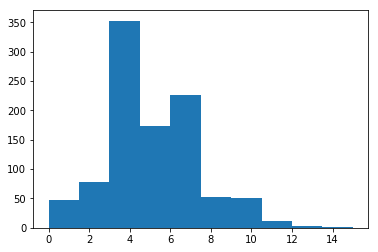

In [32]:
plt.hist(xs);

In [47]:
size = 1000
m = np.random.uniform(high=100.,low=0.1,size=size)
k = np.random.uniform(high=5.,low=0.01,size=size)
y = nbin_data(m,k,data_n=size)

## Plot test data

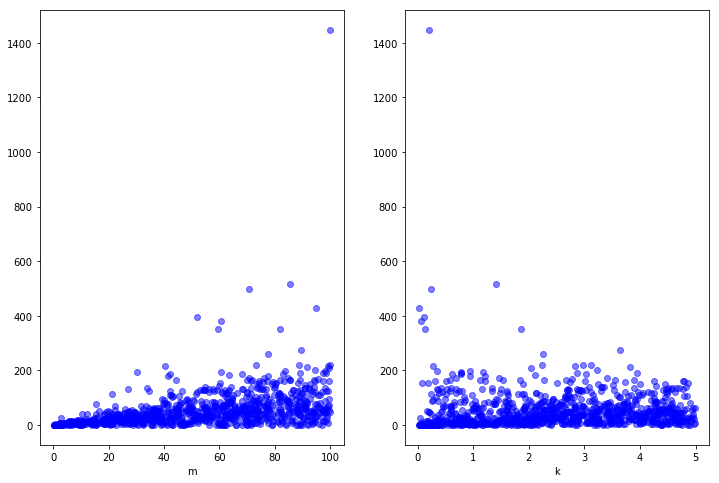

In [75]:
plt.figure(figsize=(12,8));
xs = [m,k]
x_label = ['m','k']

for i,(x,label) in enumerate(zip(xs,x_label)):
    plt.subplot(1,2,i+1);
    plt.plot(x,y,'bo',alpha=0.5);plt.xlabel(label);

## Load emulation model

In [84]:
model = pydra.load_mdn_model(cluster_size=20,output_size=1,layers=3,input_size=2,
                       dense_layer_size=64,print_summary=True)

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_7 (InputLayer)            (None, 2)            0                                            
__________________________________________________________________________________________________
dense_37 (Dense)                (None, 64)           192         input_7[0][0]                    
__________________________________________________________________________________________________
dense_38 (Dense)                (None, 64)           4160        dense_37[0][0]                   
__________________________________________________________________________________________________
dense_39 (Dense)                (None, 64)           4160        dense_38[0][0]                   
__________________________________________________________________________________________________
dense_41 (

In [85]:
def shape_for_mdn(x):
    return x.reshape(x.size,1)
m = shape_for_mdn(m)
k = shape_for_mdn(k)
y = shape_for_mdn(y)
data = np.hstack((m,k))

In [86]:
history = model.fit(data, y, epochs=800, batch_size=500,
          verbose=1)

Epoch 1/800
1000/1000 [==============================] - 0s 445us/step - loss: 7.0285
Epoch 2/800
1000/1000 [==============================] - 0s 22us/step - loss: 6.6906
Epoch 3/800
1000/1000 [==============================] - 0s 18us/step - loss: 6.6686
Epoch 4/800
1000/1000 [==============================] - 0s 22us/step - loss: 6.2161
Epoch 5/800
1000/1000 [==============================] - 0s 24us/step - loss: 6.0864
Epoch 6/800
1000/1000 [==============================] - 0s 21us/step - loss: 6.0619
Epoch 7/800
1000/1000 [==============================] - 0s 24us/step - loss: 5.8738
Epoch 8/800
1000/1000 [==============================] - 0s 20us/step - loss: 5.9252
Epoch 9/800
1000/1000 [==============================] - 0s 25us/step - loss: 5.8123
Epoch 10/800
1000/1000 [==============================] - 0s 25us/step - loss: 5.7133
Epoch 11/800
1000/1000 [==============================] - 0s 27us/step - loss: 5.7394
Epoch 12/800
1000/1000 [==============================] - 0s 2

1000/1000 [==============================] - 0s 30us/step - loss: 4.8096
Epoch 97/800
1000/1000 [==============================] - 0s 22us/step - loss: 4.8115
Epoch 98/800
1000/1000 [==============================] - 0s 18us/step - loss: 4.8074
Epoch 99/800
1000/1000 [==============================] - 0s 21us/step - loss: 4.8001
Epoch 100/800
1000/1000 [==============================] - 0s 21us/step - loss: 4.8042
Epoch 101/800
1000/1000 [==============================] - 0s 21us/step - loss: 4.8057
Epoch 102/800
1000/1000 [==============================] - 0s 27us/step - loss: 4.8011
Epoch 103/800
1000/1000 [==============================] - 0s 20us/step - loss: 4.8001
Epoch 104/800
1000/1000 [==============================] - 0s 23us/step - loss: 4.7951
Epoch 105/800
1000/1000 [==============================] - 0s 16us/step - loss: 4.7880
Epoch 106/800
1000/1000 [==============================] - 0s 20us/step - loss: 4.7836
Epoch 107/800
1000/1000 [==============================] - 0

1000/1000 [==============================] - 0s 28us/step - loss: 4.6759
Epoch 191/800
1000/1000 [==============================] - 0s 24us/step - loss: 4.6587
Epoch 192/800
1000/1000 [==============================] - 0s 24us/step - loss: 4.6480
Epoch 193/800
1000/1000 [==============================] - 0s 29us/step - loss: 4.6397
Epoch 194/800
1000/1000 [==============================] - 0s 22us/step - loss: 4.6349
Epoch 195/800
1000/1000 [==============================] - 0s 24us/step - loss: 4.6319
Epoch 196/800
1000/1000 [==============================] - 0s 24us/step - loss: 4.6311
Epoch 197/800
1000/1000 [==============================] - 0s 27us/step - loss: 4.6274
Epoch 198/800
1000/1000 [==============================] - 0s 22us/step - loss: 4.6309
Epoch 199/800
1000/1000 [==============================] - 0s 31us/step - loss: 4.6255
Epoch 200/800
1000/1000 [==============================] - 0s 25us/step - loss: 4.6194
Epoch 201/800
1000/1000 [==============================] 

1000/1000 [==============================] - 0s 29us/step - loss: 4.5726
Epoch 285/800
1000/1000 [==============================] - ETA: 0s - loss: 4.501 - 0s 32us/step - loss: 4.5655
Epoch 286/800
1000/1000 [==============================] - 0s 28us/step - loss: 4.5679
Epoch 287/800
1000/1000 [==============================] - 0s 23us/step - loss: 4.5726
Epoch 288/800
1000/1000 [==============================] - 0s 21us/step - loss: 4.5628
Epoch 289/800
1000/1000 [==============================] - 0s 23us/step - loss: 4.5643
Epoch 290/800
1000/1000 [==============================] - 0s 23us/step - loss: 4.5578
Epoch 291/800
1000/1000 [==============================] - 0s 18us/step - loss: 4.5588
Epoch 292/800
1000/1000 [==============================] - 0s 21us/step - loss: 4.5573
Epoch 293/800
1000/1000 [==============================] - 0s 23us/step - loss: 4.5550
Epoch 294/800
1000/1000 [==============================] - 0s 22us/step - loss: 4.5540
Epoch 295/800
1000/1000 [========

1000/1000 [==============================] - 0s 18us/step - loss: 4.4976
Epoch 379/800
1000/1000 [==============================] - 0s 18us/step - loss: 4.4980
Epoch 380/800
1000/1000 [==============================] - 0s 17us/step - loss: 4.4959
Epoch 381/800
1000/1000 [==============================] - 0s 17us/step - loss: 4.4945
Epoch 382/800
1000/1000 [==============================] - 0s 17us/step - loss: 4.4981
Epoch 383/800
1000/1000 [==============================] - 0s 17us/step - loss: 4.4940
Epoch 384/800
1000/1000 [==============================] - 0s 17us/step - loss: 4.4933
Epoch 385/800
1000/1000 [==============================] - 0s 17us/step - loss: 4.4929
Epoch 386/800
1000/1000 [==============================] - 0s 19us/step - loss: 4.4955
Epoch 387/800
1000/1000 [==============================] - 0s 18us/step - loss: 4.4947
Epoch 388/800
1000/1000 [==============================] - ETA: 0s - loss: 4.473 - 0s 20us/step - loss: 4.4961
Epoch 389/800
1000/1000 [========

1000/1000 [==============================] - 0s 18us/step - loss: 4.6396
Epoch 473/800
1000/1000 [==============================] - 0s 21us/step - loss: 4.6940
Epoch 474/800
1000/1000 [==============================] - 0s 21us/step - loss: 4.7528
Epoch 475/800
1000/1000 [==============================] - 0s 21us/step - loss: 4.7769
Epoch 476/800
1000/1000 [==============================] - 0s 19us/step - loss: 4.7567
Epoch 477/800
1000/1000 [==============================] - 0s 22us/step - loss: 4.6667
Epoch 478/800
1000/1000 [==============================] - 0s 23us/step - loss: 4.6140
Epoch 479/800
1000/1000 [==============================] - 0s 19us/step - loss: 4.6365
Epoch 480/800
1000/1000 [==============================] - 0s 22us/step - loss: 4.5720
Epoch 481/800
1000/1000 [==============================] - 0s 20us/step - loss: 4.5586
Epoch 482/800
1000/1000 [==============================] - 0s 29us/step - loss: 4.5595
Epoch 483/800
1000/1000 [==============================] 

Epoch 566/800
1000/1000 [==============================] - 0s 22us/step - loss: 4.4322
Epoch 567/800
1000/1000 [==============================] - 0s 25us/step - loss: 4.4259
Epoch 568/800
1000/1000 [==============================] - 0s 21us/step - loss: 4.4239
Epoch 569/800
1000/1000 [==============================] - 0s 23us/step - loss: 4.4170
Epoch 570/800
1000/1000 [==============================] - 0s 25us/step - loss: 4.4291
Epoch 571/800
1000/1000 [==============================] - 0s 22us/step - loss: 4.4300
Epoch 572/800
1000/1000 [==============================] - 0s 27us/step - loss: 4.4342
Epoch 573/800
1000/1000 [==============================] - 0s 25us/step - loss: 4.4273
Epoch 574/800
1000/1000 [==============================] - 0s 29us/step - loss: 4.4242
Epoch 575/800
1000/1000 [==============================] - 0s 23us/step - loss: 4.4263
Epoch 576/800
1000/1000 [==============================] - 0s 25us/step - loss: 4.4324
Epoch 577/800
1000/1000 [==================

1000/1000 [==============================] - 0s 22us/step - loss: 4.3995
Epoch 661/800
1000/1000 [==============================] - 0s 27us/step - loss: 4.4073
Epoch 662/800
1000/1000 [==============================] - 0s 29us/step - loss: 4.4087
Epoch 663/800
1000/1000 [==============================] - 0s 33us/step - loss: 4.4219
Epoch 664/800
1000/1000 [==============================] - 0s 23us/step - loss: 4.4779
Epoch 665/800
1000/1000 [==============================] - 0s 26us/step - loss: 4.4717
Epoch 666/800
1000/1000 [==============================] - 0s 25us/step - loss: 4.4595
Epoch 667/800
1000/1000 [==============================] - 0s 21us/step - loss: 4.4577
Epoch 668/800
1000/1000 [==============================] - 0s 22us/step - loss: 4.4329
Epoch 669/800
1000/1000 [==============================] - 0s 23us/step - loss: 4.4192
Epoch 670/800
1000/1000 [==============================] - 0s 24us/step - loss: 4.4222
Epoch 671/800
1000/1000 [==============================] 

1000/1000 [==============================] - 0s 25us/step - loss: 4.4174
Epoch 755/800
1000/1000 [==============================] - 0s 25us/step - loss: 4.4419
Epoch 756/800
1000/1000 [==============================] - 0s 19us/step - loss: 4.4108
Epoch 757/800
1000/1000 [==============================] - 0s 20us/step - loss: 4.4128
Epoch 758/800
1000/1000 [==============================] - 0s 20us/step - loss: 4.4186
Epoch 759/800
1000/1000 [==============================] - 0s 22us/step - loss: 4.3981
Epoch 760/800
1000/1000 [==============================] - 0s 24us/step - loss: 4.3961
Epoch 761/800
1000/1000 [==============================] - 0s 28us/step - loss: 4.3929
Epoch 762/800
1000/1000 [==============================] - 0s 28us/step - loss: 4.3950
Epoch 763/800
1000/1000 [==============================] - 0s 31us/step - loss: 4.3967
Epoch 764/800
1000/1000 [==============================] - 0s 26us/step - loss: 4.3869
Epoch 765/800
1000/1000 [==============================] 

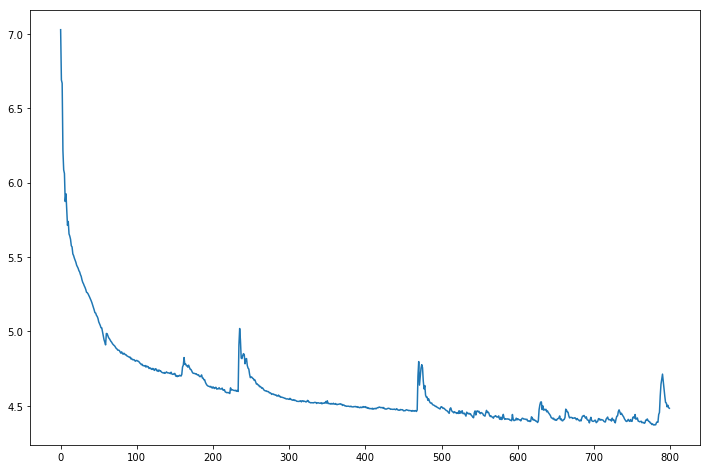

In [87]:
plt.figure(figsize=(12,8));
plt.plot(history.history['loss']);

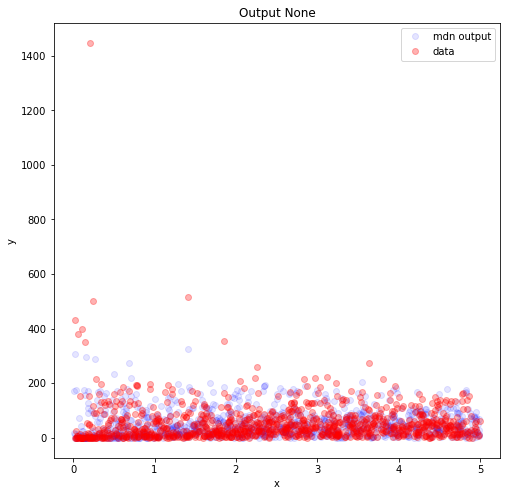

In [88]:
m_test = np.random.uniform(high=100.,low=0.1,size=size)
k_test = np.random.uniform(high=5.,low=0.01,size=size)
y_test = nbin_data(m_test,k_test,data_n=size)
m_test = shape_for_mdn(m_test)
k_test = shape_for_mdn(k_test)
y_test = shape_for_mdn(y_test)
x_test = np.hstack((m_test,k_test))

output = model.predict(x_test)
pu.plot_samples(output,y,k,k_test)

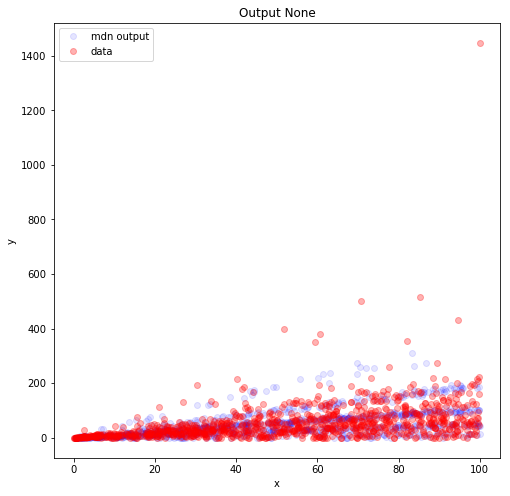

In [89]:
output = model.predict(x_test)
pu.plot_samples(output,y,m,m_test)

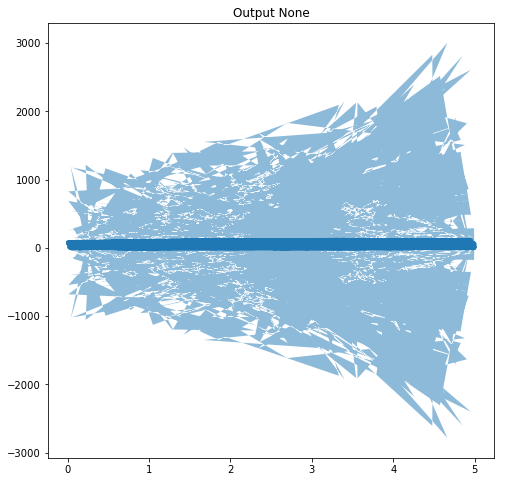

In [90]:
pu.plot_mean_and_var(output,k_test)

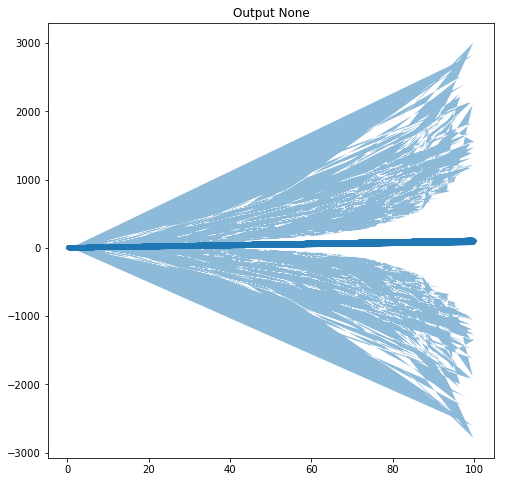

In [91]:
pu.plot_mean_and_var(output,m_test)

## Log transform data

In [103]:
size = 1000
m = np.random.uniform(high=100.,low=0.1,size=size)
k = np.random.uniform(high=5.,low=0.01,size=size)
y = nbin_data(m,k,data_n=size)
logy = np.log(y)
m = shape_for_mdn(m)
k = shape_for_mdn(k)
logy = shape_for_mdn(logy)
data = np.hstack((m,k))

//anaconda/envs/py36/lib/python3.6/site-packages/ipykernel/__main__.py:5: RuntimeWarning: divide by zero encountered in log


## Plot log of test data

As expected a mixture of normals is a poor fit to a negative binomial distribution. We can make this approximately normal by converting the output using a log. We re-fit and compare using $\log(y)$ as opposed to just $y$.

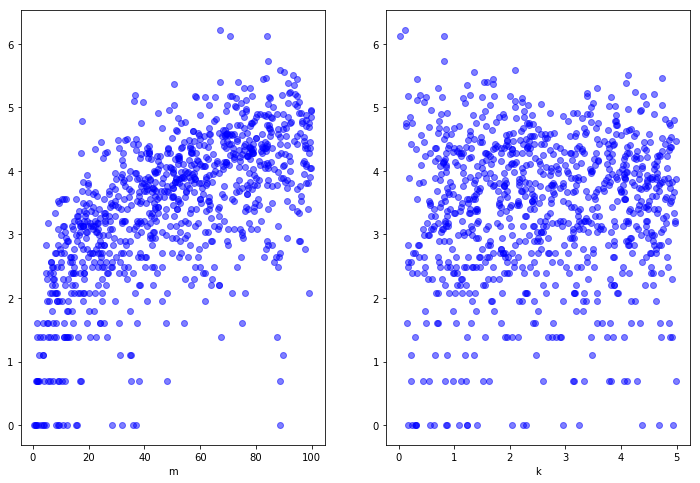

In [104]:
plt.figure(figsize=(12,8));
xs = [m,k]
x_label = ['m','k']
for i,(x,label) in enumerate(zip(xs,x_label)):
    plt.subplot(1,2,i+1);
    plt.plot(x,logy,'bo',alpha=0.5);plt.xlabel(label);

In [105]:
model = pydra.load_mdn_model(cluster_size=20,output_size=1,layers=3,input_size=2,
                       dense_layer_size=64,print_summary=False)

In [106]:
history = model.fit(data, logy, epochs=500, batch_size=500,
          verbose=1)

Epoch 1/500
1000/1000 [==============================] - 1s 555us/step - loss: nan
Epoch 2/500
1000/1000 [==============================] - 0s 19us/step - loss: nan
Epoch 3/500
1000/1000 [==============================] - 0s 19us/step - loss: nan
Epoch 4/500
1000/1000 [==============================] - 0s 20us/step - loss: nan
Epoch 5/500
1000/1000 [==============================] - 0s 19us/step - loss: nan
Epoch 6/500
1000/1000 [==============================] - 0s 21us/step - loss: nan
Epoch 7/500
1000/1000 [==============================] - 0s 18us/step - loss: nan
Epoch 8/500
1000/1000 [==============================] - 0s 20us/step - loss: nan
Epoch 9/500
1000/1000 [==============================] - 0s 21us/step - loss: nan
Epoch 10/500
1000/1000 [==============================] - 0s 20us/step - loss: nan
Epoch 11/500
1000/1000 [==============================] - 0s 22us/step - loss: nan
Epoch 12/500
1000/1000 [==============================] - 0s 22us/step - loss: nan
Epoch 13/500

1000/1000 [==============================] - 0s 26us/step - loss: nan
Epoch 100/500
1000/1000 [==============================] - 0s 21us/step - loss: nan
Epoch 101/500
1000/1000 [==============================] - 0s 19us/step - loss: nan
Epoch 102/500
1000/1000 [==============================] - 0s 20us/step - loss: nan
Epoch 103/500
1000/1000 [==============================] - 0s 20us/step - loss: nan
Epoch 104/500
1000/1000 [==============================] - 0s 20us/step - loss: nan
Epoch 105/500
1000/1000 [==============================] - 0s 20us/step - loss: nan
Epoch 106/500
1000/1000 [==============================] - 0s 17us/step - loss: nan
Epoch 107/500
1000/1000 [==============================] - 0s 18us/step - loss: nan
Epoch 108/500
1000/1000 [==============================] - 0s 17us/step - loss: nan
Epoch 109/500
1000/1000 [==============================] - 0s 17us/step - loss: nan
Epoch 110/500
1000/1000 [==============================] - 0s 22us/step - loss: nan
Epoch 

1000/1000 [==============================] - 0s 29us/step - loss: nan
Epoch 197/500
1000/1000 [==============================] - 0s 20us/step - loss: nan
Epoch 198/500
1000/1000 [==============================] - 0s 25us/step - loss: nan
Epoch 199/500
1000/1000 [==============================] - 0s 32us/step - loss: nan
Epoch 200/500
1000/1000 [==============================] - 0s 35us/step - loss: nan
Epoch 201/500
1000/1000 [==============================] - 0s 49us/step - loss: nan
Epoch 202/500
1000/1000 [==============================] - 0s 69us/step - loss: nan
Epoch 203/500
1000/1000 [==============================] - 0s 94us/step - loss: nan
Epoch 204/500
1000/1000 [==============================] - 0s 32us/step - loss: nan
Epoch 205/500
1000/1000 [==============================] - 0s 26us/step - loss: nan
Epoch 206/500
1000/1000 [==============================] - 0s 28us/step - loss: nan
Epoch 207/500
1000/1000 [==============================] - 0s 30us/step - loss: nan
Epoch 

1000/1000 [==============================] - 0s 22us/step - loss: nan
Epoch 294/500
1000/1000 [==============================] - 0s 19us/step - loss: nan
Epoch 295/500
1000/1000 [==============================] - 0s 23us/step - loss: nan
Epoch 296/500
1000/1000 [==============================] - 0s 32us/step - loss: nan
Epoch 297/500
1000/1000 [==============================] - 0s 22us/step - loss: nan
Epoch 298/500
1000/1000 [==============================] - 0s 24us/step - loss: nan
Epoch 299/500
1000/1000 [==============================] - 0s 27us/step - loss: nan
Epoch 300/500
1000/1000 [==============================] - 0s 28us/step - loss: nan
Epoch 301/500
1000/1000 [==============================] - 0s 25us/step - loss: nan
Epoch 302/500
1000/1000 [==============================] - 0s 29us/step - loss: nan
Epoch 303/500
1000/1000 [==============================] - 0s 20us/step - loss: nan
Epoch 304/500
1000/1000 [==============================] - 0s 25us/step - loss: nan
Epoch 

Epoch 390/500
1000/1000 [==============================] - 0s 31us/step - loss: nan
Epoch 391/500
1000/1000 [==============================] - 0s 32us/step - loss: nan
Epoch 392/500
1000/1000 [==============================] - 0s 59us/step - loss: nan
Epoch 393/500
1000/1000 [==============================] - 0s 48us/step - loss: nan
Epoch 394/500
1000/1000 [==============================] - 0s 21us/step - loss: nan
Epoch 395/500
1000/1000 [==============================] - 0s 22us/step - loss: nan
Epoch 396/500
1000/1000 [==============================] - 0s 27us/step - loss: nan
Epoch 397/500
1000/1000 [==============================] - 0s 30us/step - loss: nan
Epoch 398/500
1000/1000 [==============================] - 0s 25us/step - loss: nan
Epoch 399/500
1000/1000 [==============================] - 0s 29us/step - loss: nan
Epoch 400/500
1000/1000 [==============================] - 0s 26us/step - loss: nan
Epoch 401/500
1000/1000 [==============================] - 0s 31us/step - lo

1000/1000 [==============================] - 0s 20us/step - loss: nan
Epoch 488/500
1000/1000 [==============================] - 0s 16us/step - loss: nan
Epoch 489/500
1000/1000 [==============================] - 0s 28us/step - loss: nan
Epoch 490/500
1000/1000 [==============================] - 0s 29us/step - loss: nan
Epoch 491/500
1000/1000 [==============================] - 0s 29us/step - loss: nan
Epoch 492/500
1000/1000 [==============================] - 0s 27us/step - loss: nan
Epoch 493/500
1000/1000 [==============================] - 0s 32us/step - loss: nan
Epoch 494/500
1000/1000 [==============================] - 0s 28us/step - loss: nan
Epoch 495/500
1000/1000 [==============================] - 0s 16us/step - loss: nan
Epoch 496/500
1000/1000 [==============================] - 0s 14us/step - loss: nan
Epoch 497/500
1000/1000 [==============================] - 0s 13us/step - loss: nan
Epoch 498/500
1000/1000 [==============================] - 0s 15us/step - loss: nan
Epoch 

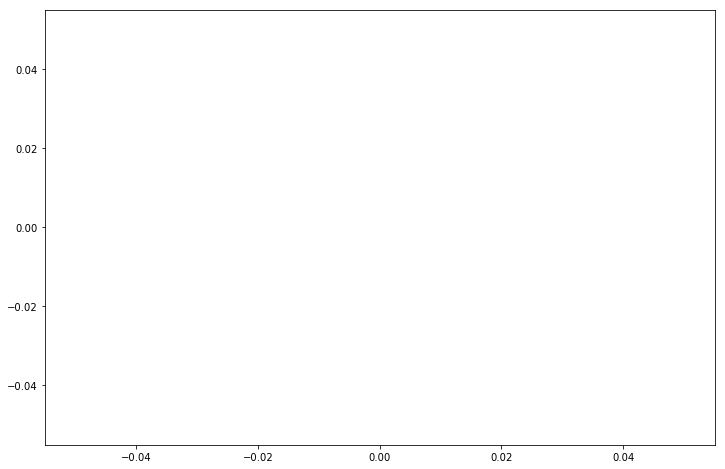

In [107]:
plt.figure(figsize=(12,8));
plt.plot(history.history['loss']);

../pydra.py:76: RuntimeWarning: invalid value encountered in less
  idx = np.random.choice(num_components, 1, p=out_pi[i])


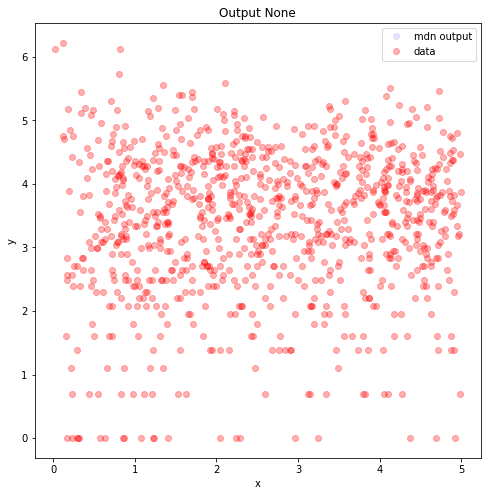

In [108]:
output = model.predict(x_test)
pu.plot_samples(output,logy,k,k_test)

In [ ]:
## Next steps

We'll need to use a mixture of gamma distributions if we want to use a normal distr